# Linear Regression Using Python
### No utlilization of the scikit-learn library

In [1]:
import pandas as pd
from functools import reduce

In [32]:
def simple_linear_regression_train(x,y):
    #Simple error handling-- makes sure that the s and y values are the same length
    if len(x) != len(y):
        return "Inputs are different lengths"
    
    x_mean = reduce(lambda x,y: x+y, x)/len(x)
    y_mean = reduce(lambda x,y: x+y, y)/len(y)
    
    standardized_y = [i - y_mean for i in y]
    standardized_x = [i - x_mean for i in x]
    standardized_x_squared = [i*i for i in standardized_x]
    
    first_sum = reduce(lambda x,y: x+y, [standardized_x[i]*standardized_y[i] for i in range(len(x))])
    second_sum = reduce(lambda x,y: x+y, standardized_x_squared)
                       
    B1 = first_sum/second_sum
    B0 = y_bar - (B1*x_bar)
    
    
    return B0, B1
                       
def simple_linear_regression_predict(train_x, train_y, test_data):
    b0, b1 = simple_linear_regression_train(train_x, train_y)
    print(b1, b0)
    y_pred = [(b0 + (b1*i)) for i in test_data]
    return y_pred
                       
    


In [33]:
print(simple_linear_regression_predict([1,2,3,4,5], [1,2,3,4,5], [6,7,8,9,10]))

1.0 0.0
[6.0, 7.0, 8.0, 9.0, 10.0]


## Simple linear Regression using sci-kit learn

In [154]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [155]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()
feature = boston['RM'].values.reshape(-1,1)
print(feature.shape)

(506, 1)


In [156]:
lr = linear_model.LinearRegression()
boston_target = pd.DataFrame(boston_dataset.target, columns=["COST"])
target = boston_target['COST'].values.reshape(-1,1)

In [157]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=.33, random_state=2 )

In [158]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [159]:
y_pred = lr.predict(x_test)

In [160]:
print(r2_score(y_test, y_pred))


0.5655618834602316


167 167


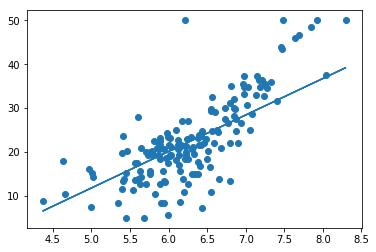

In [161]:
print(len(x_test), len(y_test))
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, '-')

### We will attempt to do an aimation with matplotlib. Each Iteration will show each point plotted with a new regression line going through it.

<Figure size 432x288 with 0 Axes>

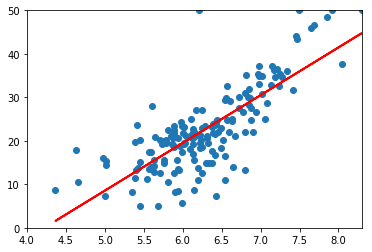

In [163]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from IPython.display import HTML

fig = plt.figure()
fig, ax = plt.subplots()
ax.set(xlim = (4, max(x_test)), ylim = (0, max(y_test)))
points, = ax.plot([], [],marker="o", ls="")
line, = ax.plot([], [], lw=2, color="r")


def init():
    points.set_data([], [])
    line.set_data([], [])
    return points, line,

def animate(i):
    x = x_test[0: i+1]
    y = y_test[0: i+1]
    points.set_data(x, y)
    
    lr = linear_model.LinearRegression()
    lr.fit(x, y)
    y_pred = lr.predict(x)
    line.set_data(x, y_pred)
    
    return points, line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(x_test), interval=20, blit=True)

HTML(anim.to_jshtml())

### Getting the distribution of the residuals of the plot

In [166]:
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
residuals = [y0 - y_hat for y0,y_hat in zip(y_test, y_pred)]

[array([-4.18511393]), array([3.38614176]), array([7.63890515]), array([7.6994545]), array([2.23690036]), array([2.42798134]), array([-5.57562837]), array([-1.32459089]), array([-3.10378861]), array([0.36356094]), array([4.74070124]), array([-0.01716276]), array([2.89086699]), array([4.51017838]), array([-11.61508779]), array([-2.02071984]), array([0.21459842]), array([-4.22366653]), array([-16.52873205]), array([-9.60825251]), array([-1.99846176]), array([-1.96106853]), array([6.35700453]), array([-5.54683143]), array([-6.83763353]), array([4.59710943]), array([17.50566185]), array([3.8920176]), array([4.89973338]), array([-0.98035361]), array([3.60185221]), array([0.6697946]), array([4.33030887]), array([0.96771087]), array([-6.41386701]), array([-1.43197517]), array([-4.96758108]), array([-1.70469543]), array([2.91104134]), array([-0.48599443]), array([-3.02487854]), array([-2.95007455]), array([-0.38779928]), array([1.57724905]), array([0.86652517]), array([-7.92635189]), array([6.

In [4]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

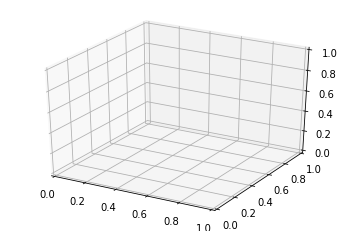

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')